In [ ]:
%cd drive/MyDrive/Colab\ Notebooks

/content/drive/MyDrive/Colab Notebooks


In [ ]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 500)

import matplotlib.pyplot as plt
import seaborn as sns
import tokenize
from wordcloud import STOPWORDS

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("spam_train.csv")

In [ ]:
df.columns

Index(['Category', 'Message'], dtype='object')

### Meta features
- Word count
- Unique word count
- Stop word count
- Mean word length

In [ ]:
# word_count
df['word_count'] = df['Message'].apply(lambda x: len(str(x).split()))

# unique_word_count
df['unique_word_count'] = df['Message'].apply(lambda x: len(set(str(x).split())))

# stop_word_count
df['stop_word_count'] = df['Message'].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS]))

# mean_word_length
df['mean_word_length'] = df['Message'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

In [ ]:
df.head()

,Category,Message,word_count,unique_word_count,stop_word_count,mean_word_length
0,ham,"Go until jurong point, crazy.. Available only ...",20,20,4,4.600000
1,ham,Ok lar... Joking wif u oni...,6,6,0,4.000000
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28,24,5,4.571429
3,ham,U dun say so early hor... U c already then say...,11,10,2,3.545455
4,ham,"Nah I don't think he goes to usf, he lives aro...",13,12,6,3.769231


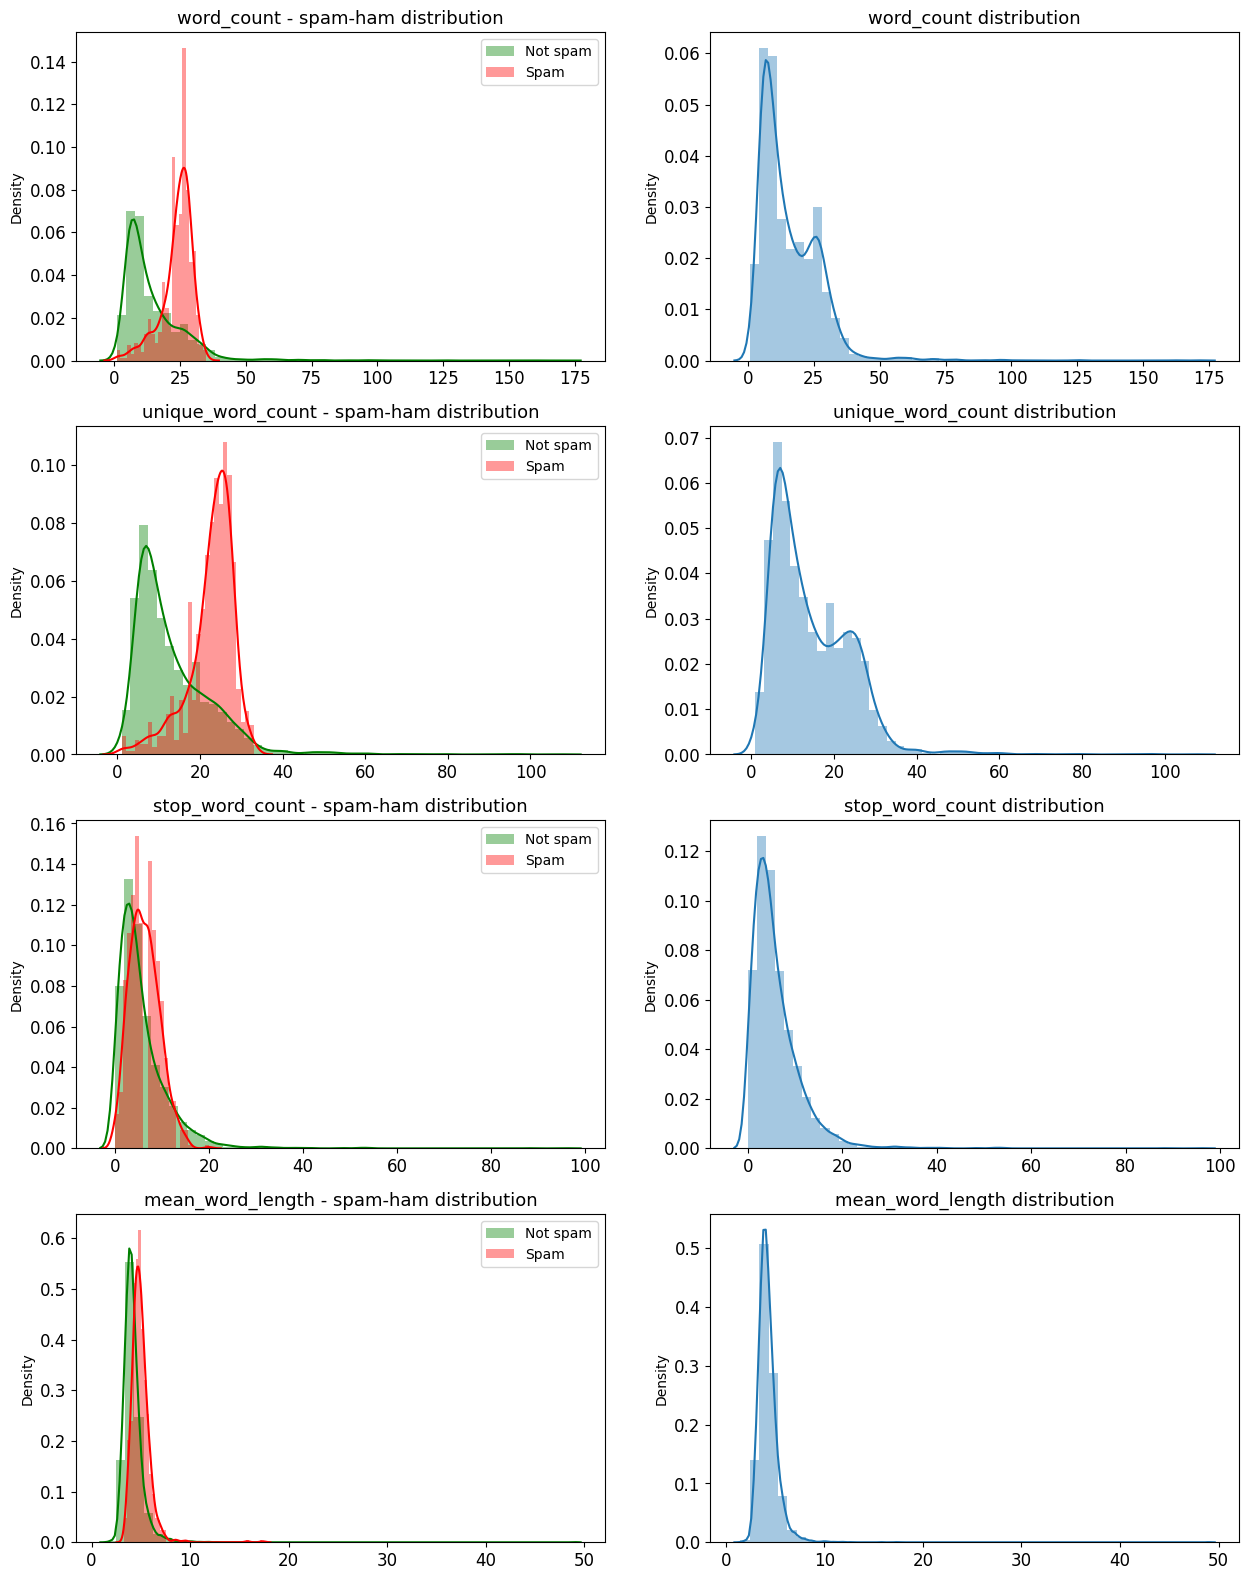

In [ ]:
METAFEATURES = ['word_count', 'unique_word_count', 'stop_word_count', 'mean_word_length']
SPAM = df['Category'] == "spam"

fig, axes = plt.subplots(ncols=2, nrows=len(METAFEATURES), figsize=(15, 20), dpi=100)

for i, feature in enumerate(METAFEATURES):
    sns.distplot(df.loc[~SPAM][feature], label='Not spam', ax=axes[i][0], color='green')
    sns.distplot(df.loc[SPAM][feature], label='Spam', ax=axes[i][0], color='red')
    axes[i][0].legend()

    sns.distplot(df[feature], ax=axes[i][1])
    
    for j in range(2):
        axes[i][j].set_xlabel('')
        axes[i][j].tick_params(axis='x', labelsize=12)
        axes[i][j].tick_params(axis='y', labelsize=12)
    
    axes[i][0].set_title(f'{feature} - spam-ham distribution', fontsize=13)
    axes[i][1].set_title(f'{feature} distribution', fontsize=13)

plt.show()

### Category distribution 
86.6% are non-spams, 13.4% are spam

In [ ]:
df['Category'].value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

In [ ]:
df['Category'].value_counts()/len(df['Category'])*100

ham     86.593683
spam    13.406317
Name: Category, dtype: float64

### Investigate n-grams

In [26]:
from collections import defaultdict

def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(' ') if token != '' if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [' '.join(ngram) for ngram in ngrams]

N = 10

# Unigrams
spam_unigrams = defaultdict(int)
ham_unigrams = defaultdict(int)

for mail in df[SPAM]['Message']:
    for word in generate_ngrams(mail):
        spam_unigrams[word] += 1
        
for mail in df[~SPAM]['Message']:
    for word in generate_ngrams(mail):
        ham_unigrams[word] += 1
        
df_spam_unigrams = pd.DataFrame(sorted(spam_unigrams.items(), key=lambda x: x[1])[::-1])
df_ham_unigrams = pd.DataFrame(sorted(ham_unigrams.items(), key=lambda x: x[1])[::-1])

# Bigrams
spam_bigrams = defaultdict(int)
ham_bigrams = defaultdict(int)

for mail in df[SPAM]['Message']:
    for word in generate_ngrams(mail, n_gram=2):
        spam_bigrams[word] += 1
        
for mail in df[~SPAM]['Message']:
    for word in generate_ngrams(mail, n_gram=2):
        ham_bigrams[word] += 1
        
df_spam_bigrams = pd.DataFrame(sorted(spam_bigrams.items(), key=lambda x: x[1])[::-1])
df_ham_bigrams = pd.DataFrame(sorted(ham_bigrams.items(), key=lambda x: x[1])[::-1])

# Trigrams
spam_trigrams = defaultdict(int)
ham_trigrams = defaultdict(int)

for mail in df[SPAM]['Message']:
    for word in generate_ngrams(mail, n_gram=3):
        spam_trigrams[word] += 1
        
for mail in df[~SPAM]['Message']:
    for word in generate_ngrams(mail, n_gram=3):
        ham_trigrams[word] += 1
        
df_spam_trigrams = pd.DataFrame(sorted(spam_trigrams.items(), key=lambda x: x[1])[::-1])
df_ham_trigrams = pd.DataFrame(sorted(ham_trigrams.items(), key=lambda x: x[1])[::-1])

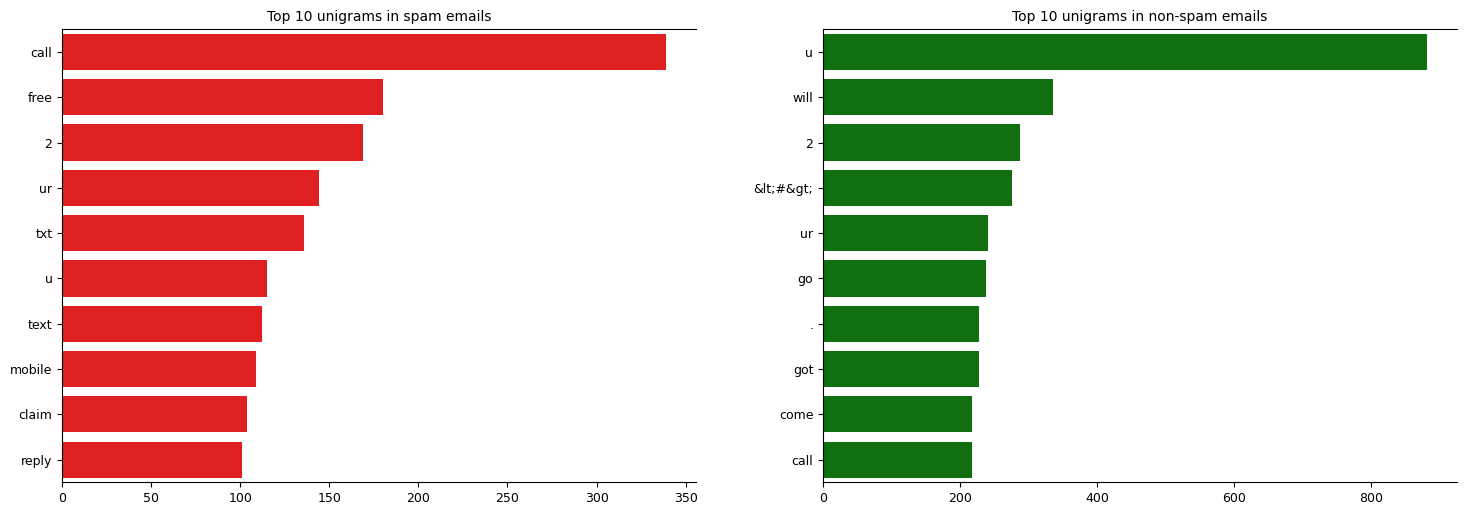

In [33]:
fig, axes = plt.subplots(ncols=2, dpi=100, figsize=(18, 6))

sns.barplot(y=df_spam_unigrams[0].values[:N], x=df_spam_unigrams[1].values[:N], ax=axes[0], color='red')
sns.barplot(y=df_ham_unigrams[0].values[:N], x=df_ham_unigrams[1].values[:N], ax=axes[1], color='green')

for i in range(2):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=9)
    axes[i].tick_params(axis='y', labelsize=9)

axes[0].set_title(f'Top {N} unigrams in spam emails', fontsize=10)
axes[1].set_title(f'Top {N} unigrams in non-spam emails', fontsize=10)

plt.show()

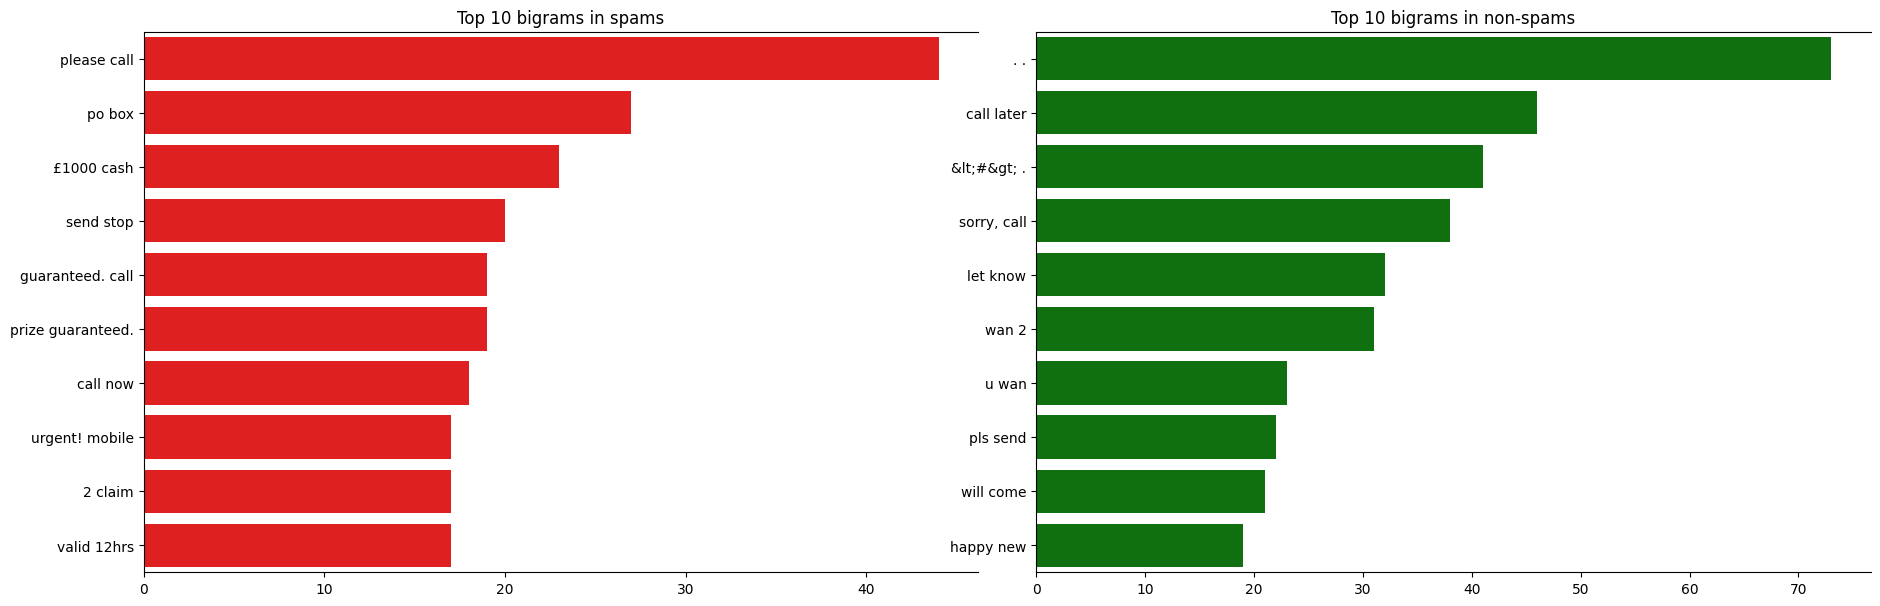

In [35]:
fig, axes = plt.subplots(ncols=2, dpi=100, figsize=(18, 6))
plt.tight_layout()

sns.barplot(y=df_spam_bigrams[0].values[:N], x=df_spam_bigrams[1].values[:N], ax=axes[0], color='red')
sns.barplot(y=df_ham_bigrams[0].values[:N], x=df_ham_bigrams[1].values[:N], ax=axes[1], color='green')

for i in range(2):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x')
    axes[i].tick_params(axis='y')

axes[0].set_title(f'Top {N} bigrams in spams')
axes[1].set_title(f'Top {N} bigrams in non-spams')

plt.show()

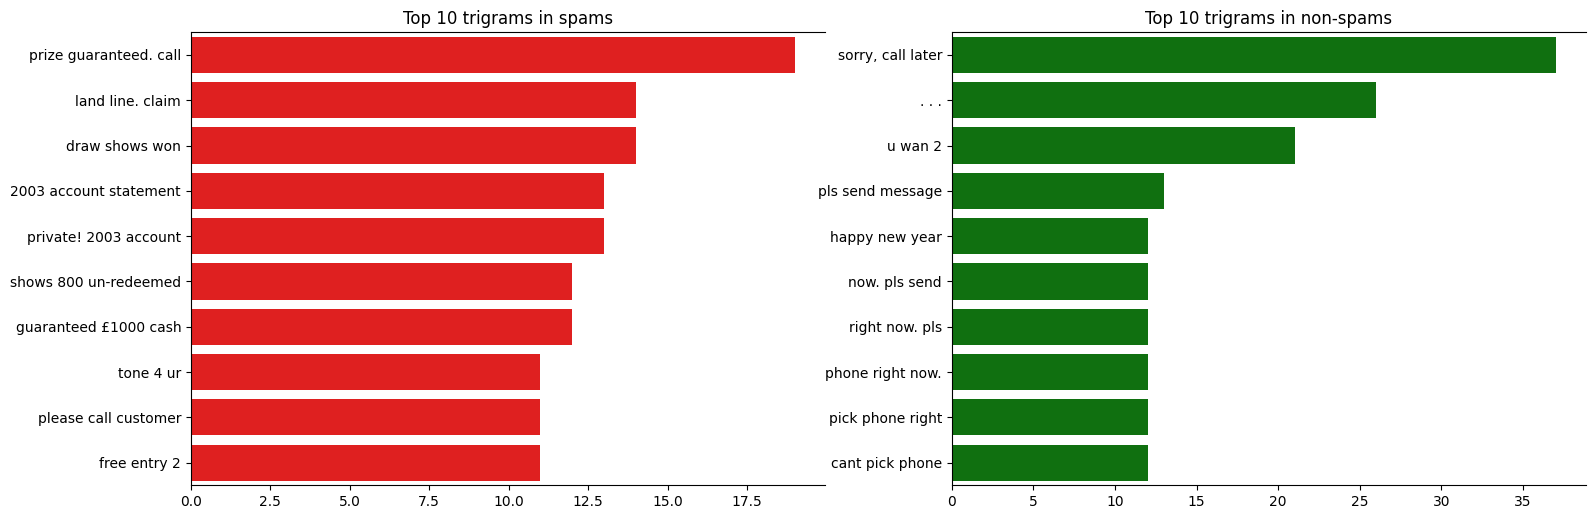

In [34]:
fig, axes = plt.subplots(ncols=2, dpi=100, figsize=(18, 6))

sns.barplot(y=df_spam_trigrams[0].values[:N], x=df_spam_trigrams[1].values[:N], ax=axes[0], color='red')
sns.barplot(y=df_ham_trigrams[0].values[:N], x=df_ham_trigrams[1].values[:N], ax=axes[1], color='green')

for i in range(2):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x')
    axes[i].tick_params(axis='y')

axes[0].set_title(f'Top {N} trigrams in spams')
axes[1].set_title(f'Top {N} trigrams in non-spams')

plt.show()